# **HW7**

2217014 통계학과 송채원

https://youtu.be/bkZ1D9vlDVg

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset


### 2.2 Load data

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd

In [ ]:
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
np.array(mnist["target"].values).astype(float)

array([5., 0., 4., ..., 4., 5., 6.])

In [ ]:
X = torch.tensor(mnist["data"].values, dtype=torch.float32).reshape([-1, 28* 28])
Y = torch.tensor(np.array(mnist["target"].values).astype(float), dtype=torch.float32)
print(X.shape, Y.shape)

T = torch.nn.functional.one_hot(torch.tensor(Y, dtype=torch.int64), num_classes=10)
T = torch.tensor(T, dtype=torch.float32)


torch.Size([70000, 784]) torch.Size([70000])


<ipython-input-20-70aebe54c424>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.nn.functional.one_hot(torch.tensor(Y, dtype=torch.int64), num_classes=10)
<ipython-input-20-70aebe54c424>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.tensor(T, dtype=torch.float32)


In [ ]:
X.shape

torch.Size([70000, 784])

In [ ]:
Y.shape

torch.Size([70000])

In [ ]:
Y[:10]

tensor([5., 0., 4., 1., 9., 2., 1., 3., 1., 4.])

In [ ]:
T[:10]

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

tensor(5.)


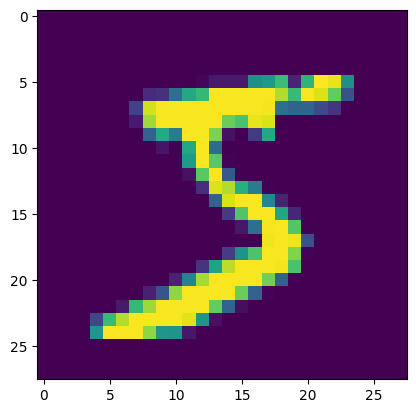

In [ ]:
plt.imshow(X[0].reshape(28,28))
print(Y[0])

"그림: [28.28] matrix  =  길이가 [784]인 Vector =784개의 설명변수

In [ ]:
X[0]

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

In [ ]:
x_train = torch.tensor(X[:60000, :]/255, dtype = torch.float32)
y_train = torch.tensor(Y[:60000], dtype = torch.float32)
t_train = torch.tensor(T[:60000], dtype = torch.float32)
n=60000
x_test = torch.tensor(X[60000:, :]/255, dtype = torch.float32)
y_test = torch.tensor(Y[60000:], dtype = torch.float32)
t_test = torch.tensor(T[60000:], dtype = torch.float32)

<ipython-input-27-fd234ed319a3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X[:60000, :]/255, dtype = torch.float32)
<ipython-input-27-fd234ed319a3>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y[:60000], dtype = torch.float32)
<ipython-input-27-fd234ed319a3>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_train = torch.tensor(T[:60000], dtype = torch.float32)
<ipython-input-27-fd234ed319a3>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon

In [ ]:
X.shape

torch.Size([70000, 784])

In [ ]:
traindata = TensorDataset(x_train, t_train)
trainloader=DataLoader(dataset = traindata, batch_size=32, shuffle=True)
testdata = TensorDataset(x_test, t_test)
testloader=DataLoader(dataset = testdata, batch_size=32, shuffle=True)

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)[:, :2] #4개 다 쓰면 예측력 너무 좋아서 일부러 두 개만 사용~~
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-42-258dd8df59de>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-42-258dd8df59de>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


In [ ]:
print(X.shape, t.shape)

torch.Size([150, 2]) torch.Size([150, 3])


## **Exercise 2.3.4** Revisiting Iris data (HW)

We use `train_loader` to train the model, and use `test_loader` to calculate the test accuracy. Use the following code to train the model, and calculate the test accuracy. In this case, you need to define your own loss function to calculate cross-entropy function from `q_hat` and `tt`.
```
z_model = nn.Linear(784, 10, bias=True)
```
and
```
for xx, tt in train_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax()
```

### data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)[:, :2] #4개 다 쓰면 예측력 너무 좋아서 일부러 두 개만 사용~~
y = torch.tensor(iris.target, dtype=torch.long)

tt = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
tt = torch.tensor(tt, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, tt, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

<ipython-input-44-d6f52592bb5e>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tt = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-44-d6f52592bb5e>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tt = torch.tensor(tt, dtype=torch.float32)


In [ ]:
print(X.shape, tt.shape)

torch.Size([150, 2]) torch.Size([150, 3])


### model

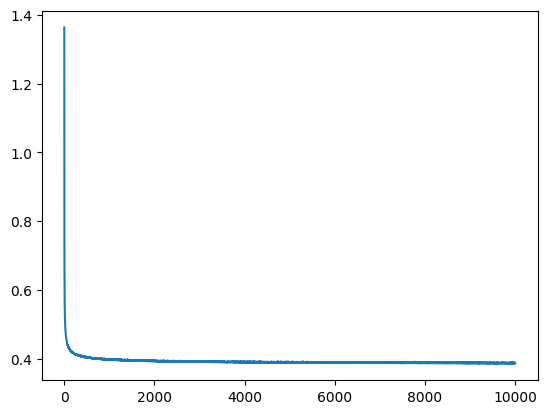

In [ ]:
z_model = nn.Linear(2, 3, bias=True) #X:[n, 2] #입력 차원 2, 출력 차원 3

def loss_ftc(tt, q_hat):
  return -torch.mean(torch.sum(tt * torch.log(q_hat), axis=1)) #cross-entropy function from q_hat and tt

epochs = 10000
optimizer = torch.optim.SGD(z_model.parameters(), lr=0.1)
history = []
n_train = len(train_loader.dataset)


for epoch in range(epochs):
  LOSS = 0
  for xx, tt in train_loader:
    zhat = z_model(xx)
    q_hat = torch.softmax(zhat, axis=1) #확률 변환
    loss = loss_ftc(tt, q_hat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    LOSS += loss.item()*len(xx)
  history.append(LOSS/n_train)

plt.plot(history)

### test accuracy 계산

In [ ]:
Correct = 0
n_test = len(test_loader.dataset)

for xx, tt in test_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax(zhat, axis=1) #[n, 3]
  yhat = torch.argmax(q_hat, axis=1) #예측값
  y = torch.argmax(tt, axis=1) #실제값
  correct = torch.sum((yhat == y)*1.0).item() #batch러닝이므로 mean말고 sum으로 정답 개수 파악
  Correct +=correct

Correct/n_test #정확도 계산

0.9

정확도는 0.9이다.

### 설명변수 모두 사용한 경우 -> accuracy : 1.0

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

tt = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
tt = torch.tensor(tt, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, tt, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

<ipython-input-49-8880a9556188>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tt = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-49-8880a9556188>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tt = torch.tensor(tt, dtype=torch.float32)


In [ ]:
print(X.shape, tt.shape)

torch.Size([150, 4]) torch.Size([150, 3])


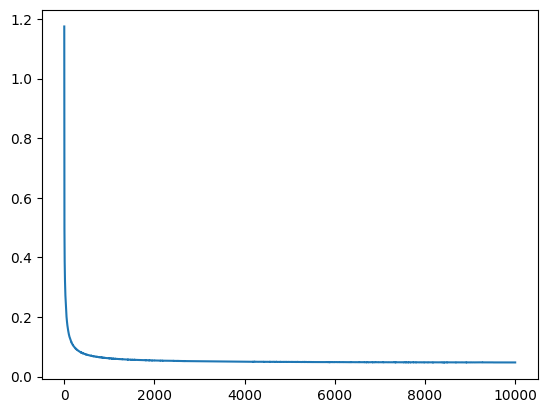

In [ ]:
z_model = nn.Linear(4, 3, bias=True) #입력 차원 4, 출력 차원 3

def loss_ftc(tt, q_hat):
  return -torch.mean(torch.sum(tt * torch.log(q_hat), axis=1)) #cross-entropy function from q_hat and tt

epochs = 10000
optimizer = torch.optim.SGD(z_model.parameters(), lr=0.1)
history = []
n_train = len(train_loader.dataset)


for epoch in range(epochs):
  LOSS = 0
  for xx, tt in train_loader:
    zhat = z_model(xx)
    q_hat = torch.softmax(zhat, axis=1) #확률 변환
    loss = loss_ftc(tt, q_hat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    LOSS += loss.item()*len(xx)
  history.append(LOSS/n_train)

plt.plot(history)

In [ ]:
Correct = 0
n_test = len(test_loader.dataset)

for xx, tt in test_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax(zhat, axis=1)
  yhat = torch.argmax(q_hat, axis=1) #예측값
  y = torch.argmax(tt, axis=1) #실제값
  correct = torch.sum((yhat == y)*1.0).item() #batch러닝이므로 mean말고 sum으로 정답 개수 파악
  Correct +=correct

Correct/n_test #정확도 계산

1.0

## **Exercise 2.3.5**: Fashion MNIST data (HW)

You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. Calculate the test accuracy. In the test dataset, identify at least 5 cases where your predictions are wrong, and explain why possibly they were mis-classified.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [ ]:
xx, yy = trainset[0]

Ankle boot


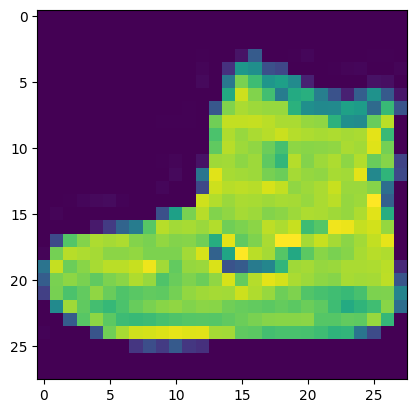

In [ ]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])

### model

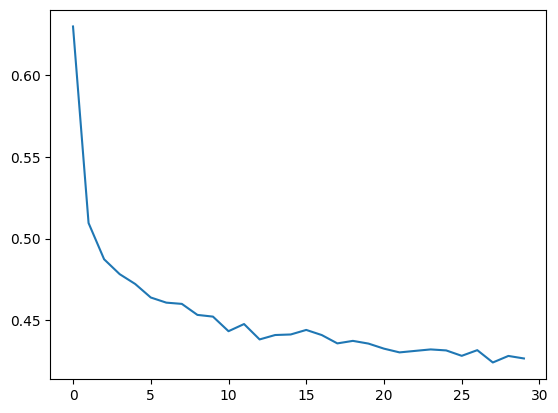

In [ ]:
z_model = nn.Linear(28*28, 10, bias=True)  # 입력 크기: 28x28=784, 출력 크기: 10

def loss_ftc(t, q_hat):
    return -torch.mean(torch.sum(t * torch.log(q_hat), axis=1))

optimizer = optim.SGD(z_model.parameters(), lr=0.1)

epochs = 30
history = []
n_train = len(train_loader.dataset)

for epoch in range(epochs):
    LOSS = 0
    for xx, tt in train_loader:
        xx = xx.view(-1, 28 * 28)  # 2D 이미지를 1D 벡터로 변환
        zhat = z_model(xx)
        q_hat = torch.softmax(zhat, axis=1)   # softmax로 확률 계산
        tt_onehot = torch.nn.functional.one_hot(tt, num_classes=10) # 원핫인코딩으로 변환
        loss = loss_ftc(tt_onehot, q_hat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        LOSS += loss.item() * len(xx)
    history.append(LOSS / n_train)

plt.plot(history)

### test accuracy

In [ ]:
Correct = 0
n_test = len(test_loader.dataset)

for xx, tt in test_loader:
  xx = xx.view(-1, 28 * 28)
  zhat = z_model(xx)  # 모델 출력
  q_hat = torch.softmax(zhat, axis=1)
  yhat = torch.argmax(q_hat, axis=1) #예측값
  correct = torch.sum((yhat == tt)*1.0).item() #원-핫 인코딩 전의 tt(실제 클래스가 정수형이기에 바로 비교 가능)와 비교하여 정확도 계산
  Correct +=correct

Correct/n_test #정확도 계산

0.8315

정확도는 0.8315이다.

### 오분류 사례

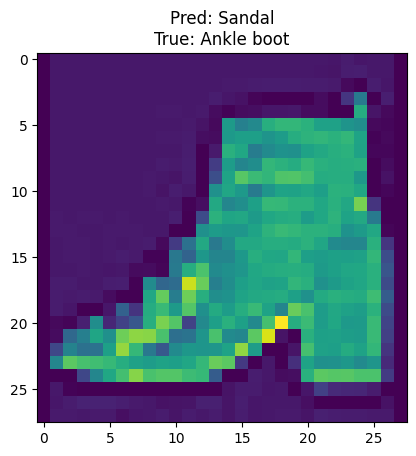

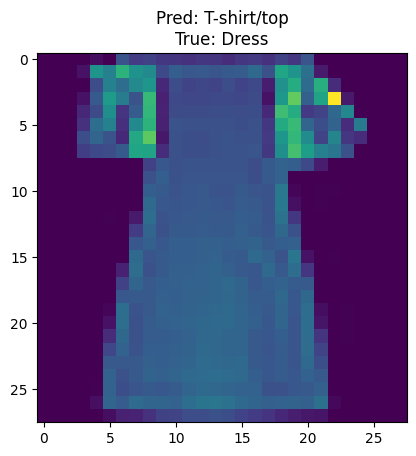

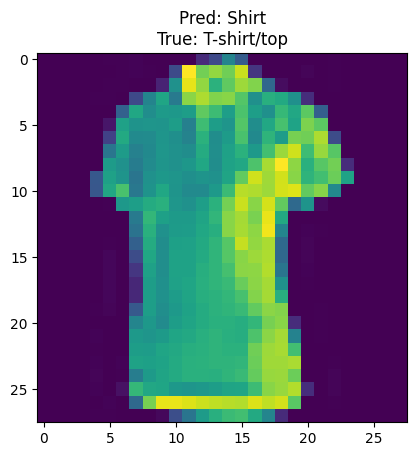

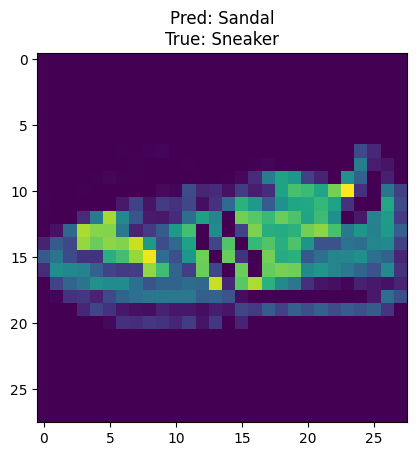

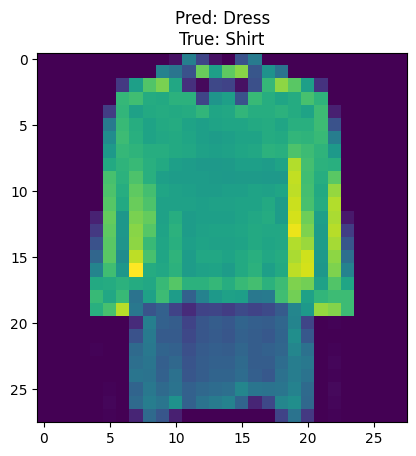

In [ ]:
misclassified = [] #오분류 사례 저장할 리스트 생성

for xx, tt in test_loader:
  xx = xx.view(-1, 28 * 28)
  zhat = z_model(xx)
  q_hat = torch.softmax(zhat, axis=1)
  yhat = torch.argmax(q_hat, axis=1)
  mis_idx = (yhat != tt).nonzero(as_tuple=True)[0] #예측값과 실제값 다른 인덱스를 가져옴
  #오분류된 사례의 xx, yhat, tt를 모두 misclassified에 저장
  for idx in mis_idx:
            misclassified.append((xx[idx], yhat[idx].item(), tt[idx].item()))

my_name = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
           5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

for i, (img, pred, true) in enumerate(misclassified[:5]):  # 첫 5개만 확인
    plt.imshow(img.view(28, 28)) #1D 벡터를 2D 이미지로 복원
    plt.title(f"Pred: {my_name[pred]}\nTrue: {my_name[true]}") #예측된 종류와 실제 종류 함께 출력
    plt.show()

**explain why possibly they were mis-classified**


오분류된 이미지를 보면, 해상도가 낮아 형태 구분이 어려운 경우가 있다. 특히 스니커즈의 발등 부분이나 셔츠의 허리선 등이 명확하게 드러나지 않는 것을 통해, 중요한 특징이 손실되거나 왜곡되어 분류 오류가 발생했음을 유추해 볼 수 있다.

또한, 학습률이 오분류 이미지의 원인일 수도 있다. 설정했던 학습률 0.1이 너무 컸다면 모델이 최적값에 도달하지 못하고 진동했을 것인데, 이로 인해 모델 정확도가 떨어지면서 오분류 사례가 일어났을 수 있다.

혹은 일부 클래스가 학습 데이터에 너무 적게 등장하는 등 학습 데이터의 클래스 불균형이 원인일 수도 있다. 예를 들어, 만약 train_loader에 "Sneaker"와 "Sandal" 클래스가 너무 적은 비율로 존재했다면, 모델은 해당 클래스를 충분히 학습하지 못해 오분류로 이어졌을 수 있다.

